# Single Particle Simulation Example

In this example we simulate the trajectory of a particle in an idealized representation of an ocean eddy. To start, we use solid body rotation around a central point. As an exercise left to the user, directions are provided e.g. to add a convergence / divergence term. 

- 1. setup the software and initialize example
- 2. simulate trajectories & plot results
- 3. experiment with parameters (user)

### For More Documentation 

- <https://docs.juliadiffeq.org/latest> 
- <https://en.wikipedia.org/wiki/Displacement_(vector)>
- <https://juliaclimate.github.io/IndividualDisplacements.jl/dev>
- <https://juliaclimate.github.io/MeshArrays.jl/dev>


## 1.1 Import Software, i.e. `Julia` Packages

In [1]:
using OrdinaryDiffEq, Plots
using IndividualDisplacements, MeshArrays

┌ Info: Precompiling IndividualDisplacements [b92f0c32-5b7e-11e9-1d7b-238b2da8b0e6]
└ @ Base loading.jl:1273


## 1.2  Gridded Domain Example

- define `SetPeriodicDomain` function, which uses `MeshArrays.jl`
- call `SetPeriodicDomain` function with a chosen grid size; e.g. `np=16`

In [2]:
"""
    SetupPeriodicDomain(np::Integer=16)

Set up a periodic domain of size np x np

```
np=16 #domain size is np x np
γ,Γ=SetPeriodicDomain(np)
```
"""
function SetupPeriodicDomain(np::Integer=16)
    γ,Γ=GridOfOnes("PeriodicDomain",1,np)
    Γ["XC"][1]=vec(0.5:1.0:np-0.5)*ones(1,np)
    Γ["XG"][1]=vec(0.0:1.0:np-1.0)*ones(1,np)
    Γ["YC"][1]=ones(np,1)*transpose(vec(0.5:1.0:np-0.5))
    Γ["YG"][1]=ones(np,1)*transpose(vec(0.0:1.0:np-1.0))
    return γ,Γ
end

SetupPeriodicDomain

In [3]:
#?SetupPeriodicDomain

In [4]:
np=16

γ,Γ=SetupPeriodicDomain(np);

In [5]:
#show(Γ["XC"])

## 1.3 Define Period & Velocity ...

- define time range
- define velocity field(s)
- store in `𝑃` (dictionary) with grid variables

In [6]:
#time range
t0=0.0
t1=0.95*2*pi
#t1=2.95*2*pi

#solid-body rotation around central location
i=Int(np/2+1)
u=-(Γ["YG"].-Γ["YG"][1][i,i])
v=(Γ["XG"].-Γ["XG"][1][i,i])

#add some convergence to / divergence from central location
d=0.0 
#d=-0.02
u=u+d*(Γ["XG"].-Γ["XG"][1][i,i])
v=v+d*(Γ["YG"].-Γ["YG"][1][i,i])

#store everything in a dictionnary
𝑃=Dict("u0" => u, "u1" => u, "v0" => v, "v1" => v, "t0" => t0, "t1" => t1)
𝑃=merge(𝑃,Γ);

## 1.4 Define initial position and time period

In [7]:
u0=np*[1/3,1/3]
du=fill(0.0,2)
𝑇 = (𝑃["t0"],𝑃["t1"]);

## 2.1 solve for particle trajectory

- `ODEProblem` formulates the differential equation along with the time period `𝑇`, parameters `𝑃`
- `solve` then performs the integration over `𝑇`, starting from `u0`

_Try `?ODEProblem` or `?solve` for additional documentation_

In [8]:
prob = ODEProblem(⬡,u0,𝑇,𝑃)
sol = solve(prob,Tsit5(),reltol=1e-8)

x,y=sol[1,:],sol[2,:]
nt=length(x)

290

## 2.2 visualize particle trajectory

- define `myplot` convenience function
- generate animation using `myplot`

_Want a single plot? try uncommenting one line at a time in the next cell below_

In [9]:
myplot(i)=plot(x[1:i],y[1:i],linewidth=2,arrow = 2,
    title="Solid body rotation / Spiral example",leg=false,
    xaxis="x",yaxis="y",xlims=(0,np),ylims=(0,np))

myplot (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /var/folders/1m/ddjxkwvn7bz7z9shdnh8q3040000gn/T/SolidBodyRotation.gif
└ @ Plots /Users/gforget/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/var/folders/1m/ddjxkwvn7bz7z9shdnh8q3040000gn/T/SolidBodyRotation.gif")
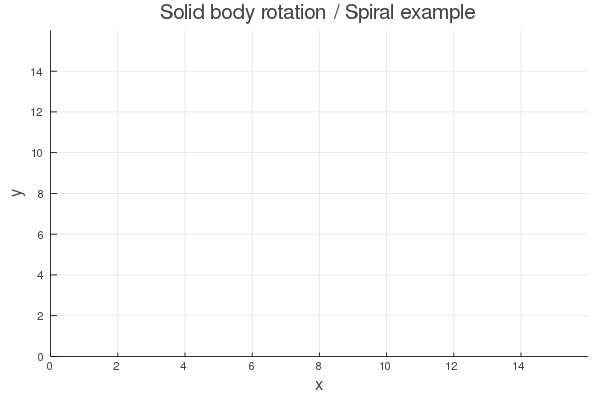

In [10]:
p=Int(ceil(nt/100))
anim = @animate for i ∈ 1:p:nt
    myplot(i)
end
pth=tempdir()*"/"
gif(anim, pth*"SolidBodyRotation.gif", fps = 15)

In [11]:
#plt=myplot(nt)
#scatter!(plt,[u0[1]],[u0[2]])
#savefig(plt,pth*"SolidBodyRotation.png")